# Assignment 1: Workspace Configuration

In this assignment I configure your machine learning environment needed to run the Jupyter Notebooks from Geron Text
https://github.com/ageron/handson-ml
Here, I will illustrating the basic python packages needed to run a Juypter notebook.

## Introduction

First, import a few common modules like numpy etc.

In [105]:
# Common imports
import numpy as np
import os

from sklearn.datasets import *
import pandas as pd

import matplotlib.pyplot as plt

## NumPy Array

Here we see how to create and generate Arrays

In [106]:
arr = np.array([1,3,5,8,9,17,5,6,9,7,1,3,22,12,10])

print('arr:', arr)
print('arr plus 5:', arr + 5)
print('first 5th element of arr:', arr[:5])
print('sum of arr:', np.sum(arr))
print('max value in arr:', np.max(arr))
print('index of max value in arr:', np.argmax(arr))
print('std of arr:', np.std(arr))
print('arr sorted:', np.sort(arr))
print()

arr_even = np.arange(2,20,2)
print('arr_even:', arr_even)

arr: [ 1  3  5  8  9 17  5  6  9  7  1  3 22 12 10]
arr plus 5: [ 6  8 10 13 14 22 10 11 14 12  6  8 27 17 15]
first 5th element of arr: [1 3 5 8 9]
sum of arr: 118
max value in arr: 22
index of max value in arr: 12
std of arr: 5.59603033905
arr sorted: [ 1  1  3  3  5  5  6  7  8  9  9 10 12 17 22]

arr_even: [ 2  4  6  8 10 12 14 16 18]


## NumPy Random

Here we see how to generate random numbers

In [107]:
# to make this notebook's output stable across runs
np.random.seed(13)

rnd = np.random.rand(4)
print(rnd)

[ 0.77770241  0.23754122  0.82427853  0.9657492 ]


## Pandas and Dataset

Now lets use the saved csv dataset from local storage

In [108]:
quakes = pd.read_csv("datasets/quakes.csv")
print(quakes.info())
print()
print(quakes.head(5))
print()
print(quakes.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
latitude     1000 non-null float64
longitude    1000 non-null float64
depth        1000 non-null int64
magnitude    1000 non-null float64
stations     1000 non-null int64
dtypes: float64(3), int64(2)
memory usage: 39.1 KB
None

   latitude  longitude  depth  magnitude  stations
0    -20.42     181.62    562        4.8        41
1    -20.62     181.03    650        4.2        15
2    -26.00     184.10     42        5.4        43
3    -17.97     181.66    626        4.1        19
4    -20.42     181.96    649        4.0        11

     latitude  longitude  depth  magnitude  stations
995    -25.93     179.54    470        4.4        22
996    -12.28     167.06    248        4.7        35
997    -20.13     184.20    244        4.5        34
998    -17.40     187.80     40        4.5        14
999    -21.59     170.56    165        6.0       119


## Matplotlib and Histogram

Lets draw Histogram to represent the data from the csv

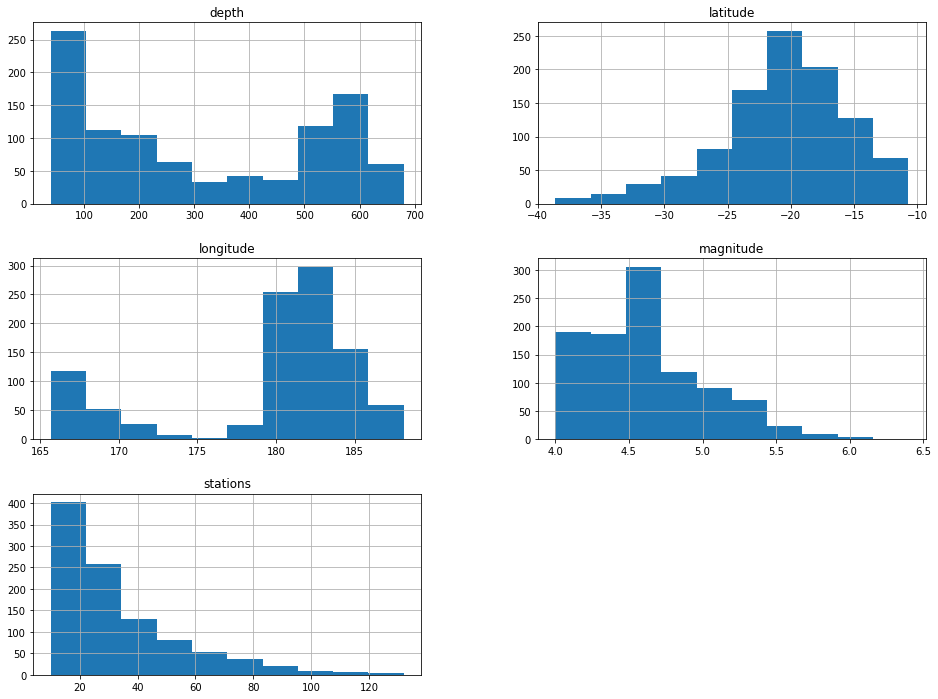

In [109]:
quakes.hist(figsize=(16,12))
plt.show()

## Matplotlib and Density Graph

Lets plot Density Graph to represent the data from the csv

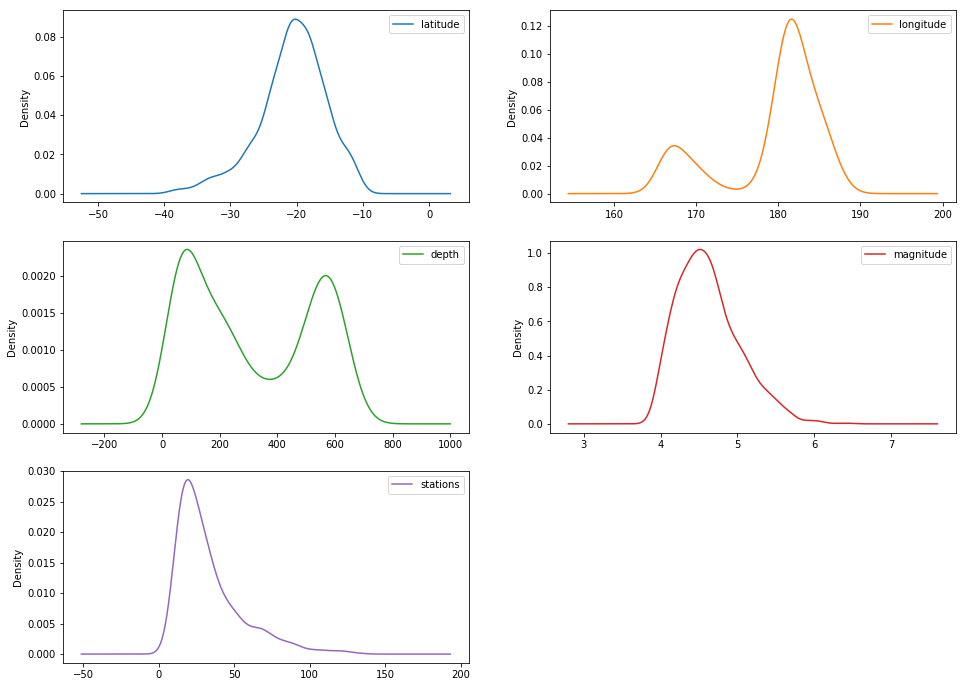

In [110]:
quakes.plot(kind='density', subplots=True, layout=(3,2), figsize=(16,12), sharex=False)
plt.show()

## Dataset Information

Get information from csv and represent it

In [111]:
print(quakes["magnitude"].describe())
print()
print(quakes[["latitude", "longitude"]].describe())

count    1000.000000
mean        4.620400
std         0.402773
min         4.000000
25%         4.300000
50%         4.600000
75%         4.900000
max         6.400000
Name: magnitude, dtype: float64

          latitude    longitude
count  1000.000000  1000.000000
mean    -20.642750   179.462020
std       5.028791     6.069497
min     -38.590000   165.670000
25%     -23.470000   179.620000
50%     -20.300000   181.410000
75%     -17.637500   183.200000
max     -10.720000   188.130000


## Sklearn

Playing around with sklearn

In [112]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(quakes, test_size=0.2, random_state=42)

print(train_set.describe())
print()
print("Training Percentages:")
print()
print(train_set.count() / quakes.count())

         latitude   longitude       depth   magnitude    stations
count  800.000000  800.000000  800.000000  800.000000  800.000000
mean   -20.588763  179.390837  308.466250    4.615625   33.246250
std      5.053690    6.117067  217.445527    0.404936   21.808258
min    -38.590000  165.670000   40.000000    4.000000   10.000000
25%    -23.475000  179.655000   95.750000    4.300000   18.000000
50%    -20.205000  181.410000  242.500000    4.500000   27.000000
75%    -17.605000  183.000000  542.250000    4.800000   41.000000
max    -10.720000  188.130000  680.000000    6.400000  132.000000

Training Percentages:

latitude     0.8
longitude    0.8
depth        0.8
magnitude    0.8
stations     0.8
dtype: float64


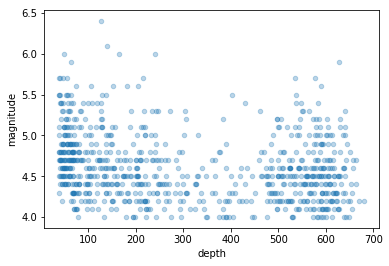

In [113]:
train_set.plot(kind="scatter", x="depth", y="magnitude", alpha=0.3)
plt.show()

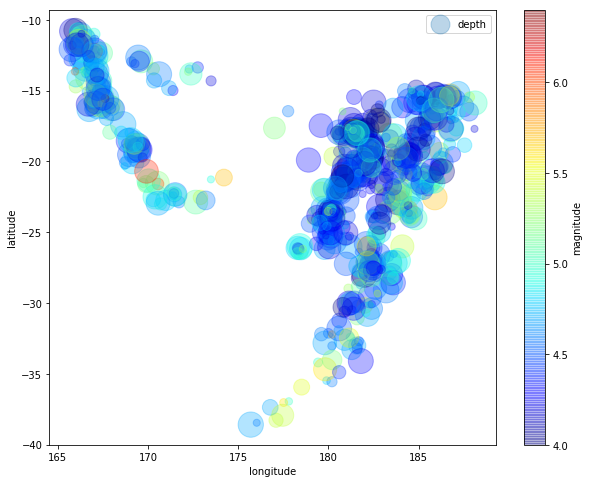

In [114]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, s=quakes["depth"], label="depth", 
               figsize=(10,8), c="magnitude", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
plt.show()

### Examine Correlation between features and label

In [115]:
corr_matrix = train_set.corr()
corr_matrix["magnitude"].sort_values(ascending=False)

magnitude    1.000000
stations     0.854263
latitude    -0.061931
longitude   -0.182888
depth       -0.238186
Name: magnitude, dtype: float64

### Draw scatter matrix of Depth and Madniture

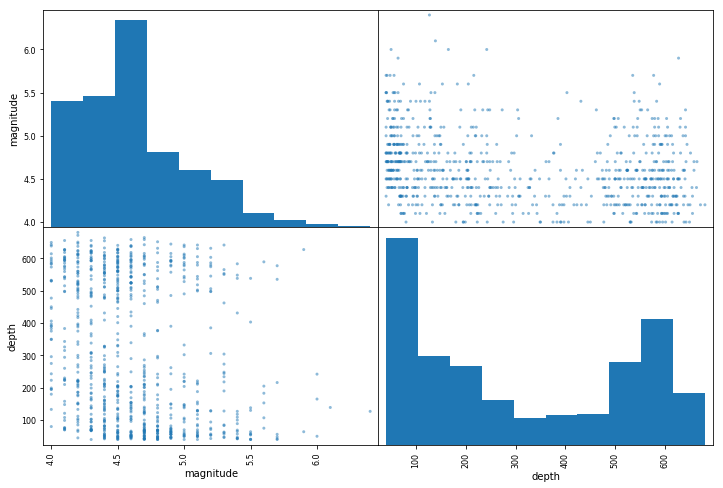

In [116]:
from pandas.plotting import scatter_matrix

attributes = ["magnitude", "depth"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

## Prepare the data for Machine Learning algorithms

Here we use train_set to make data ready for Machine Learning algorithms

In [117]:
earthquakes = train_set.drop("magnitude", axis=1) # drop labels for training set
earthquakes_labels = train_set["magnitude"].copy()

print (earthquakes_labels.describe())
print (earthquakes.describe())

count    800.000000
mean       4.615625
std        0.404936
min        4.000000
25%        4.300000
50%        4.500000
75%        4.800000
max        6.400000
Name: magnitude, dtype: float64
         latitude   longitude       depth    stations
count  800.000000  800.000000  800.000000  800.000000
mean   -20.588763  179.390837  308.466250   33.246250
std      5.053690    6.117067  217.445527   21.808258
min    -38.590000  165.670000   40.000000   10.000000
25%    -23.475000  179.655000   95.750000   18.000000
50%    -20.205000  181.410000  242.500000   27.000000
75%    -17.605000  183.000000  542.250000   41.000000
max    -10.720000  188.130000  680.000000  132.000000


In [118]:
earthquakes_m = earthquakes["depth"].copy()
print(type(earthquakes_m))
print (earthquakes_m.describe())
print (earthquakes_m.iloc[:5])

<class 'pandas.core.series.Series'>
count    800.000000
mean     308.466250
std      217.445527
min       40.000000
25%       95.750000
50%      242.500000
75%      542.250000
max      680.000000
Name: depth, dtype: float64
29     328
535     68
695    579
557     64
836    209
Name: depth, dtype: int64


Check for Null values

In [119]:
nulls = earthquakes_m.isnull()
print(nulls.loc[nulls.iloc[0:]==True])

Series([], Name: depth, dtype: bool)


## Checking out LinearRegression from sklearn

In [120]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
print(earthquakes_m.shape)
train_m = earthquakes_m.values
train_m = train_m.reshape(-1, 1)
print(train_m.shape)
train_labels = earthquakes_labels.values
lin_reg.fit(train_m, train_labels)

(800,)
(800, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
example_data = earthquakes_m.iloc[:5].values.reshape(-1,1)
example_labels = earthquakes_labels.iloc[:5]

print("Predictions:", lin_reg.predict(example_data))
print("Labels:", list(example_labels))

Predictions: [ 4.60696062  4.72228608  4.49562719  4.72406032  4.6597442 ]
Labels: [4.4000000000000004, 4.7000000000000002, 4.4000000000000004, 5.9000000000000004, 4.7000000000000002]


In [122]:
columns = ["magnitude","depth"]

earthquakes_m = quakes[columns].copy()
print(type(earthquakes_m))
earthquakes_m.describe()
print (earthquakes_m.iloc[:5])
print (earthquakes_labels.describe())
print (earthquakes.describe())

<class 'pandas.core.frame.DataFrame'>
   magnitude  depth
0        4.8    562
1        4.2    650
2        5.4     42
3        4.1    626
4        4.0    649
count    800.000000
mean       4.615625
std        0.404936
min        4.000000
25%        4.300000
50%        4.500000
75%        4.800000
max        6.400000
Name: magnitude, dtype: float64
         latitude   longitude       depth    stations
count  800.000000  800.000000  800.000000  800.000000
mean   -20.588763  179.390837  308.466250   33.246250
std      5.053690    6.117067  217.445527   21.808258
min    -38.590000  165.670000   40.000000   10.000000
25%    -23.475000  179.655000   95.750000   18.000000
50%    -20.205000  181.410000  242.500000   27.000000
75%    -17.605000  183.000000  542.250000   41.000000
max    -10.720000  188.130000  680.000000  132.000000
